In [1]:
from data_analysis import data_analysis

In [10]:
class project():
    def __init__(self):
        self.data = data_analysis()

    def gerar_dfnormalizado(self):
        df = self.data.read_file()
        df = self.data.log_valores(df)
        df = self.data.gerar_dummies(df) 

        self.data.plot_boxplot(df)
        self.data.plot_histograma(df)

        df = df.drop(['frequencia', 'recencia_valor', 'valor/freq'], axis=1)  
        df = df.replace({True: 1, False:0})
        return df     
    
    def gerar_indices(self):
        df = self.gerar_dfnormalizado()
        df_alimentar, df_ecommerce, df_hospitalar, df_varejo_direto, df_varejo_indireto = self.data.fracionar_df(df)
        # df_alimentar = self.data.indice_RFV(df_alimentar)
        # df_ecommerce = self.data.indice_RFV(df_ecommerce)
        # df_hospitalar = self.data.indice_RFV(df_hospitalar)
        # df_varejo_direto = self.data.indice_RFV(df_varejo_direto)
        # df_varejo_indireto = self.data.indice_RFV(df_varejo_indireto)
        return df, df_alimentar, df_ecommerce, df_hospitalar, df_varejo_direto, df_varejo_indireto

    def kmeans_run(self, df, k):
        df = self.data.kmeans_method(df, k)
        return df
    
    def plotar_3d(self, df):
        self.data.plotar_3d(df)

    def localizar_ponto(self, df, x, y, z, margem_erro):
        dataframe = df
        LogFrequencia = x
        LogRecencia = y
        LogValor = z
        margem_erro = 0.001
        ponto = dataframe[(dataframe['LogFrequencia'].apply(lambda x: abs(x - LogFrequencia) < margem_erro)) & (dataframe['LogRecencia'].apply(lambda x: abs(x - LogRecencia) < margem_erro)) & (dataframe['LogValor'].apply(lambda x: abs(x - LogValor) < margem_erro))]
        return ponto
    

In [11]:
run = project()

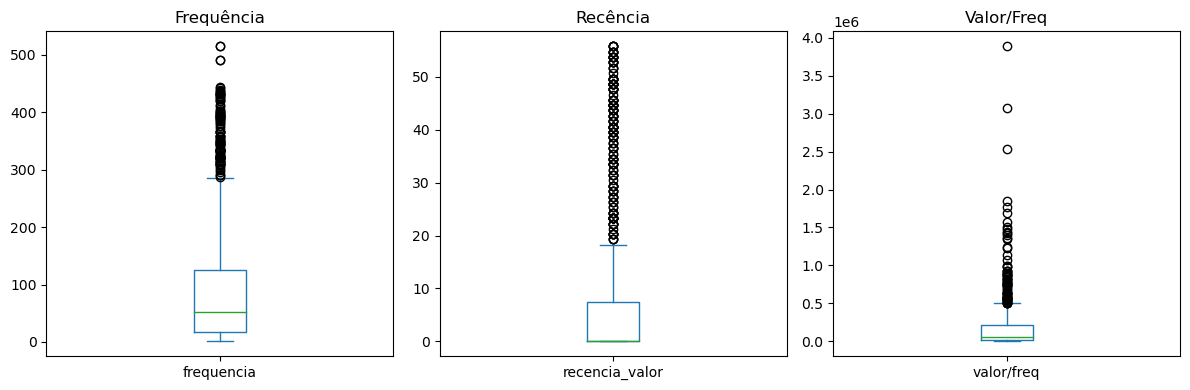

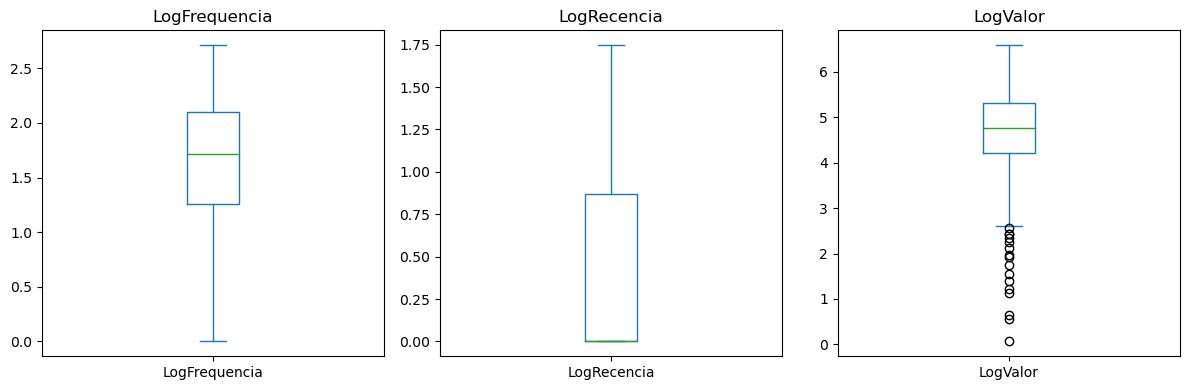

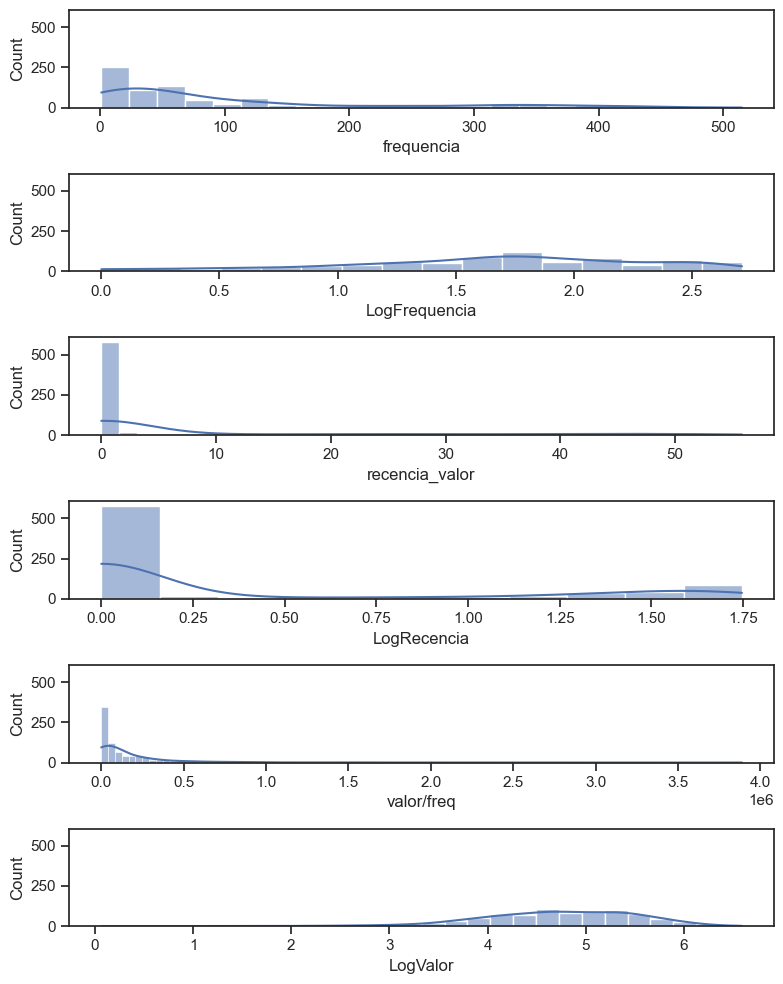

In [4]:
df, df_alimentar, df_ecommerce, df_hospitalar, df_varejo_direto, df_varejo_indireto = run.gerar_indices()

Geral
Score do coefiente de Silhueta: 0.41110154322299136


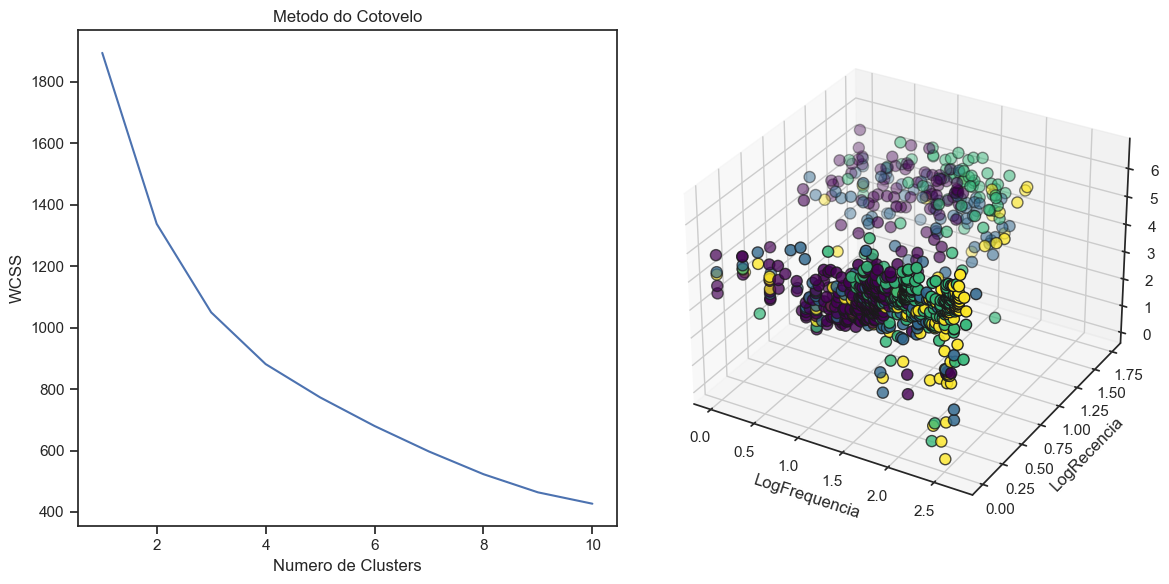

Alimentar
Score do coefiente de Silhueta: 0.6719007977270034


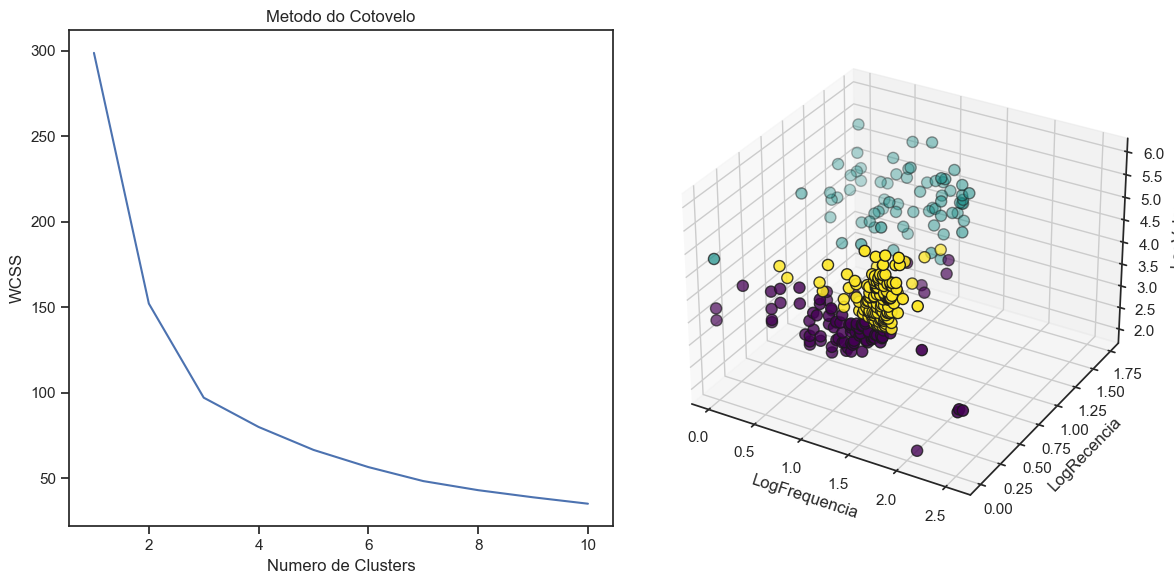

E-Commerce
Score do coefiente de Silhueta: 0.6312473598161467


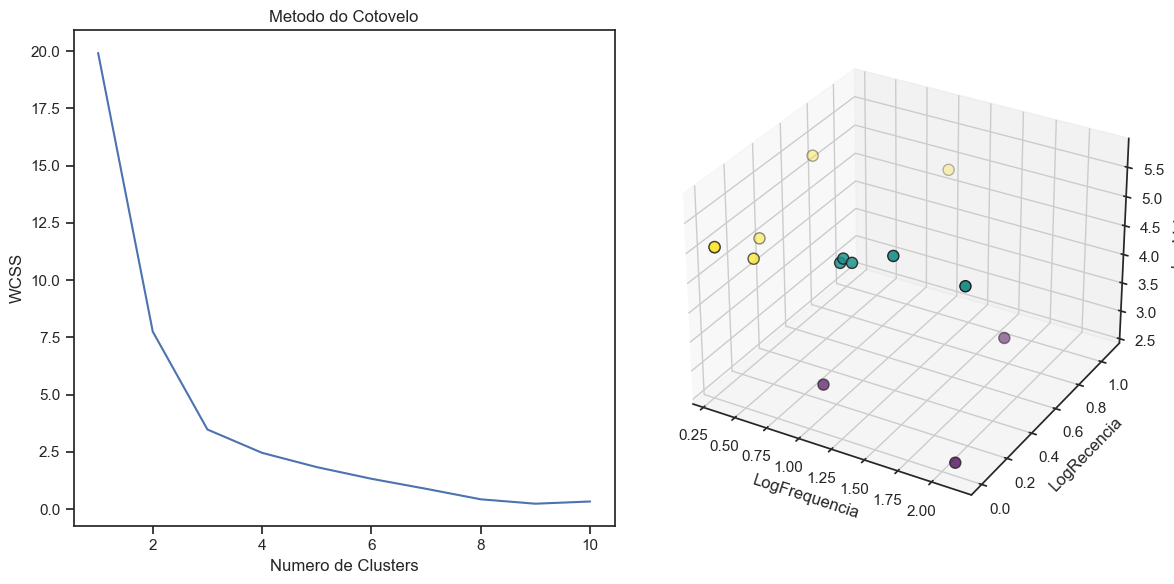

Hospitalar
Score do coefiente de Silhueta: 0.5251228360655458


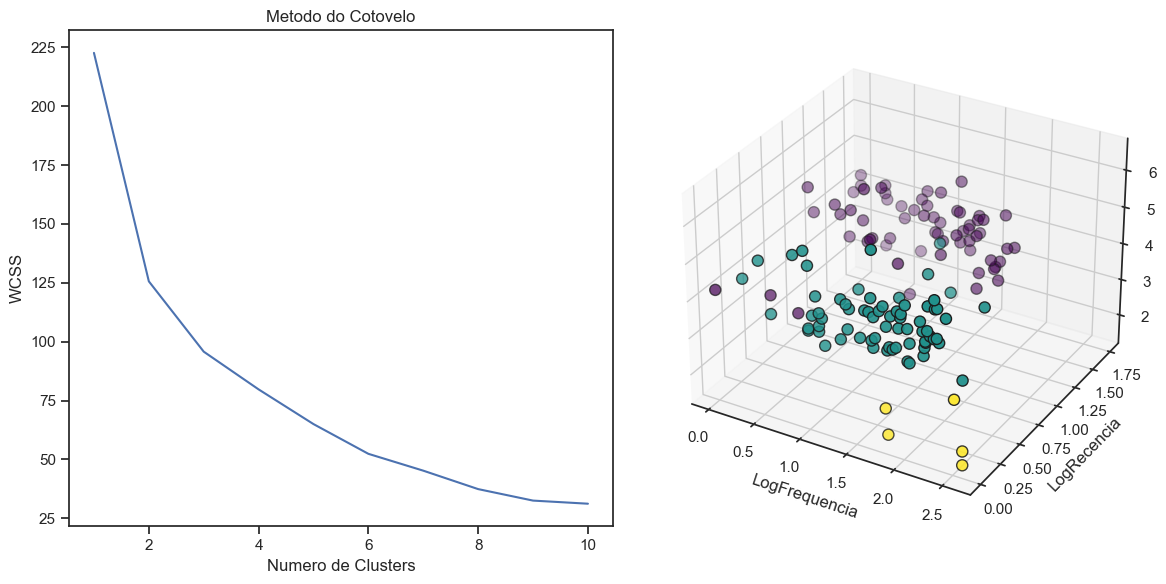

Venda Direto
Score do coefiente de Silhueta: 0.5261259174094957


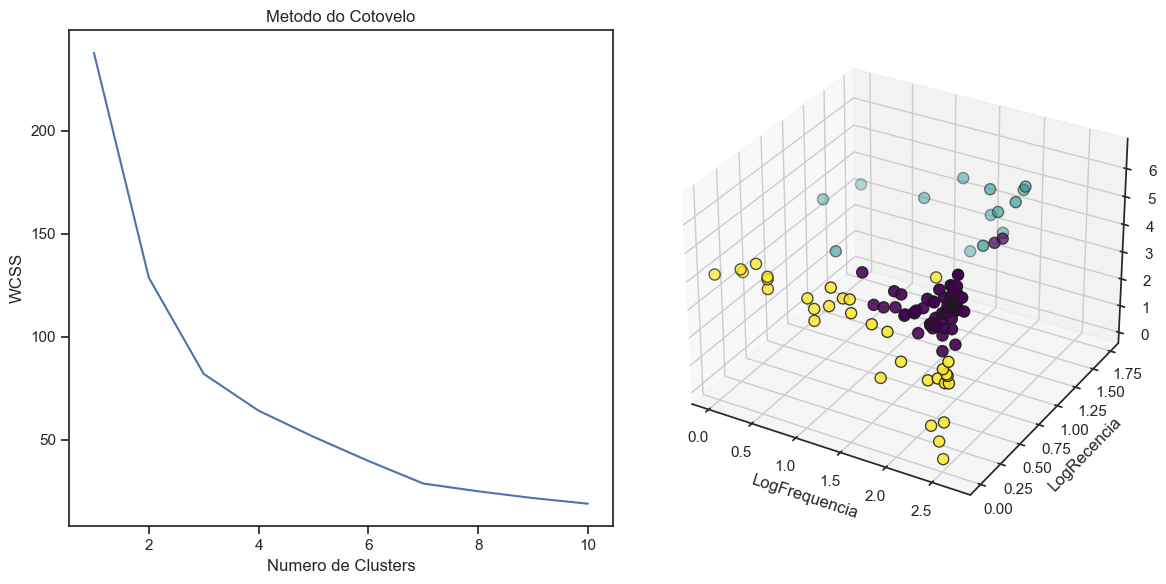

Venda Indireto
Score do coefiente de Silhueta: 0.6509099290128937


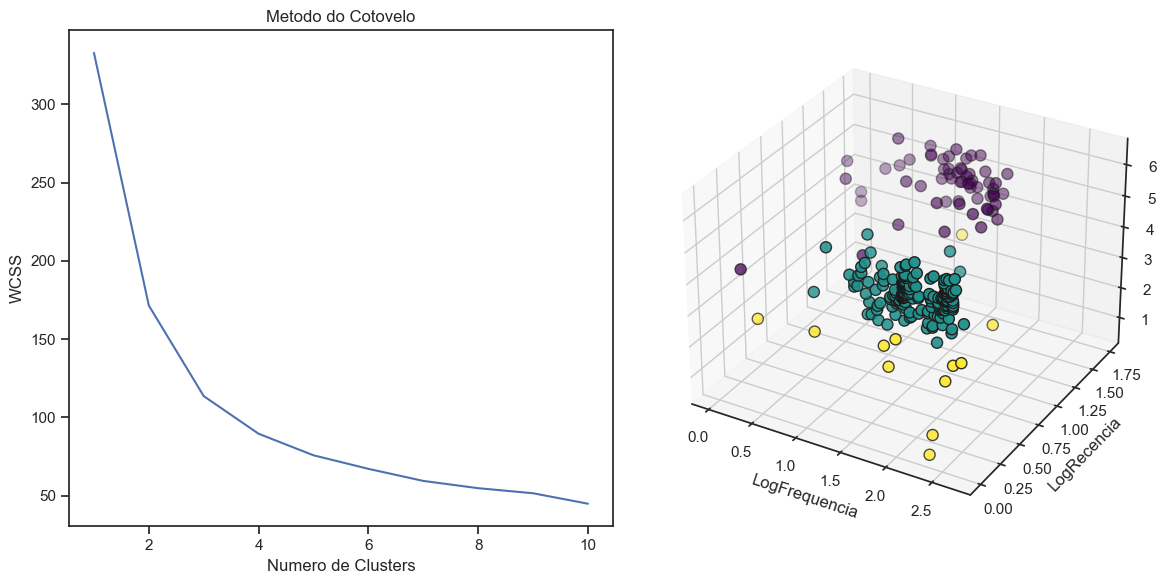

In [5]:
print("Geral")
df_kmeans = run.kmeans_run(df, 4)
print("Alimentar")
df_kmeans_a = run.kmeans_run(df_alimentar, 3)
print("E-Commerce")
df_kmeans_ec = run.kmeans_run(df_ecommerce, 3)
print("Hospitalar")
df_kmeans_hosp = run.kmeans_run(df_hospitalar, 3)
print("Venda Direto")
df_kmeans_vd = run.kmeans_run(df_varejo_direto, 3)
print("Venda Indireto")
df_kmeans_vi = run.kmeans_run(df_varejo_indireto, 3)


In [12]:
run.plotar_3d(df_kmeans_vi)

In [13]:
run.localizar_ponto(df=df_kmeans_vi, x=2.444045, y=0, z=5.34874, margem_erro=0.001)

,LogFrequencia,LogRecencia,LogValor,canal_ALIMENTAR,canal_E-COMMERCE,canal_HOSPITALAR,canal_VAREJO DIRETO,canal_VAREJO INDIRETO,Cluster
rede_uf,,,,,,,,,
PANPHARMA DIST DE MED LTDA - PE,2.444045,0.0,5.34874,0,0,0,0,1,1
